<a href="https://colab.research.google.com/github/rafaeldjsm/Data_Science/blob/master/7DaysOfCode/7DaysOfCode_d3_CEAPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baixando todo o dataset desde 2008 a 2022

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Url base
url0 = 'https://www.senado.leg.br/transparencia/LAI/verba/despesa_ceaps_'


df = pd.concat(pd.read_csv(url0+str(ano)+'.csv', encoding='latin-1', sep=';', header = 1, decimal=',') for ano in range(2008,2023))


# Resetando o índice para evitar indice repetidos da importação
df.reset_index(inplace = True, drop = True)

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310646 entries, 0 to 310645
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                310646 non-null  int64  
 1   MES                310646 non-null  int64  
 2   SENADOR            310646 non-null  object 
 3   TIPO_DESPESA       310646 non-null  object 
 4   CNPJ_CPF           307502 non-null  object 
 5   FORNECEDOR         307502 non-null  object 
 6   DOCUMENTO          286269 non-null  object 
 7   DATA               307502 non-null  object 
 8   DETALHAMENTO       176597 non-null  object 
 9   VALOR_REEMBOLSADO  310646 non-null  object 
 10  COD_DOCUMENTO      310644 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 26.1+ MB


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2.008091e+12
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,386.6,2.008091e+12
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2.008101e+12
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,2610.68,2.008101e+12
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2.008111e+12


In [2]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2.008091e+12
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,386.6,2.008091e+12
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2.008101e+12
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,2610.68,2.008101e+12
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,12351.52,2.008111e+12


# Verificando duplicados

In [3]:
dfdu = df[df['COD_DOCUMENTO'].duplicated(keep=False)]
dfdu

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
150213,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"SEM FATURA"";02/08/2015""","Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...","469,53",2014675.0,NaN
150220,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"¨¨SEM FATURA"";17/08/2015""","Companhia Aérea: AVIANCA, Localizador: ZNEU9F....","460,45",2016557.0,NaN


## Corrigindo os valores duplicados

In [45]:
dfexp = dfdu.DOCUMENTO.str.split(pat = ';',expand = True)
dfexp.replace('"','',regex=True, inplace = True)

dfm = pd.concat([dfexp,dfdu.shift(periods=1, axis="columns").loc[:,'DETALHAMENTO':]], axis = 1)
dfm.columns = df.columns[-5:]

for k in dfdu.index:
    for j in dfm.columns:
        df.loc[k,j] = dfm.loc[k,j]


# Ajustando valores numéricos que vieram como strings e convertendo para float
df.VALOR_REEMBOLSADO = df.VALOR_REEMBOLSADO.apply(lambda x: str(x).replace(',','.').replace('\r\n',''))


df.VALOR_REEMBOLSADO = df.VALOR_REEMBOLSADO.astype('float')

## Verificando as correções

In [46]:
df.loc[dfdu.index,:]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
150213,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,SEM FATURA,02/08/2015,"Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...",469.53,2014675.0
150220,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,¨¨SEM FATURA,17/08/2015,"Companhia Aérea: AVIANCA, Localizador: ZNEU9F....",460.45,2016557.0


# Analisando a distribuição dos valores reembolsados.

## Eliminando valores negativos dos dos valores reembolsados.

In [47]:
df.VALOR_REEMBOLSADO = abs(df.VALOR_REEMBOLSADO)
df.VALOR_REEMBOLSADO.describe()

count    310646.000000
mean       1001.614871
std        2557.507236
min           0.010000
25%         100.000000
50%         279.000000
75%         989.415000
max      270000.000000
Name: VALOR_REEMBOLSADO, dtype: float64

# Verificando campos com valores ausentes... interessante que os dados de fornecedor e CNPJ são os que têm mais dados faltantes... 🤔

Aqui verifiquei que os anos de 2008 e 2009 apresentam muitos dados faltantes de DATA e FORNECEDOR, mas que não atrapalha as demais analises, logo não as excluirei.

In [48]:
df.isna().sum()

ANO                       0
MES                       0
SENADOR                   0
TIPO_DESPESA              0
CNPJ_CPF               3144
FORNECEDOR             3144
DOCUMENTO             24377
DATA                   3144
DETALHAMENTO         134049
VALOR_REEMBOLSADO         0
COD_DOCUMENTO             0
dtype: int64

# Qual senador teve maior número de despensas sem detalhar o fornecedor?

In [49]:
df_sen_falt = df[df.FORNECEDOR.isna()]

df_sen_falt.groupby('SENADOR').agg({'TIPO_DESPESA':'count','VALOR_REEMBOLSADO':'sum'}).sort_values(by='TIPO_DESPESA', ascending = False).rename(columns = {'TIPO_DESPESA':'Contagem'})

,Contagem,VALOR_REEMBOLSADO
SENADOR,,
CRISTOVAM BUARQUE,62,166231.24
MOZARILDO CAVALCANTI,59,207785.24
PATRÍCIA SABOYA GOMES,58,205838.38
IDELI SALVATTI,58,211363.29
OSMAR DIAS,57,196994.40
...,...,...
ADA MELLO,8,59962.46
MARIA DO CARMO ALVES,6,21472.23
ARTHUR VIRGÍLIO,6,43316.94


# Qual senador teve maior volume de despensas sem detalhar o fornecedor?

In [50]:
df_sen_falt.groupby('SENADOR').agg({'TIPO_DESPESA':'count','VALOR_REEMBOLSADO':'sum'}).sort_values(by='VALOR_REEMBOLSADO', ascending = False)

,TIPO_DESPESA,VALOR_REEMBOLSADO
SENADOR,,
JOSÉ AGRIPINO,37,214857.97
ROMEU TUMA,14,214621.82
PAULO PAIM,51,213600.62
ROSEANA SARNEY,44,213301.59
FRANCISCO DORNELLES,42,212230.09
...,...,...
MARCO ANTÔNIO COSTA,16,45354.64
ARTHUR VIRGÍLIO,6,43316.94
EDUARDO SUPLICY,36,39679.47


# Verificando por ano qual o senador teve maior gasto anual desde 2008?

In [51]:
df_gb_ano_sen = df.groupby(['SENADOR','ANO']).agg({'VALOR_REEMBOLSADO':'sum'}).sort_values(by='VALOR_REEMBOLSADO', ascending = False)
df_gb_ano_sen

,,VALOR_REEMBOLSADO
SENADOR,ANO,
OMAR AZIZ,2019,531315.99
EDUARDO BRAGA,2018,529599.18
OMAR AZIZ,2021,527681.31
VANESSA GRAZZIOTIN,2013,521134.07
EDUARDO BRAGA,2019,519561.65
...,...,...
ORIOVISTO GUIMARÃES,2020,1548.02
OSVALDO SOBRINHO,2014,1281.28
JEFFERSON PRAIA,2011,1234.92


# Qual senador teve maior média anual de gastos?

In [52]:
df_gb_sen = df_gb_ano_sen.groupby('SENADOR').agg({'VALOR_REEMBOLSADO':'mean'}).sort_values(by='VALOR_REEMBOLSADO', ascending = False)
df_gb_sen

,VALOR_REEMBOLSADO
SENADOR,
GLADSON CAMELI,439602.1000
ROGÉRIO CARVALHO,434302.4850
VANESSA GRAZZIOTIN,430069.7300
PAULO ROCHA,424929.8600
MECIAS DE JESUS,423238.2775
...,...
IONE GUIMARÃES,11379.9100
WIRLANDE DA LUZ,11298.2500
SIQUEIRA CAMPOS,5926.9900


# Qual senador teve maior reembolso único?

In [53]:
df_gb_sen_mx = df.groupby('SENADOR').agg({'VALOR_REEMBOLSADO':'max'}).sort_values(by='VALOR_REEMBOLSADO', ascending = False)
df_gb_sen_mx.head(10)

,VALOR_REEMBOLSADO
SENADOR,
DAVI ALCOLUMBRE,270000.0
PAULO PAIM,162400.0
MOZARILDO CAVALCANTI,150000.0
ROSE DE FREITAS,134100.0
WELLINGTON FAGUNDES,120000.0
SÉRGIO PETECÃO,102000.0
VANESSA GRAZZIOTIN,100000.0
CÍCERO LUCENA,90000.0
LINDBERGH FARIAS,88245.0


# Verificando a evolução dos gastos dos senadores que tiveram maior média anual de gastos.

# Como 2022 ainda não acabou, o valor ficou baixo

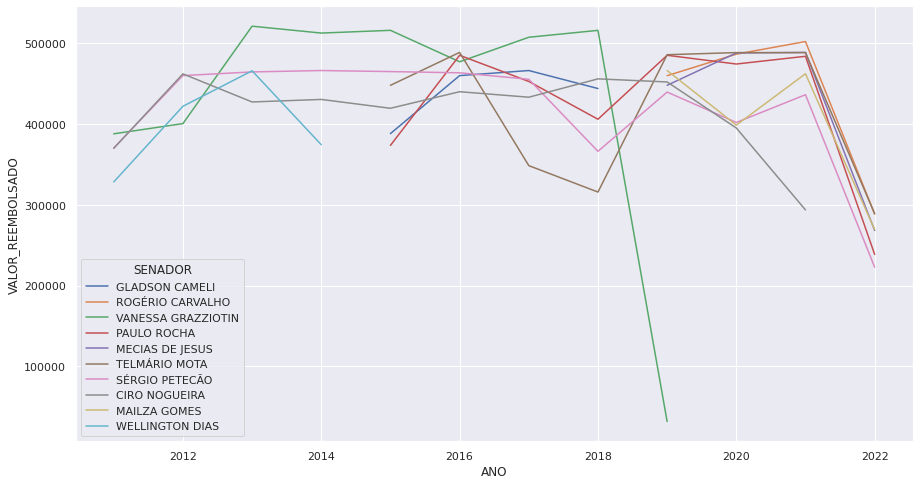

In [54]:
df_gb_ano_sen2 = df_gb_ano_sen.loc[df_gb_sen.index[:10]]
df_gb_ano_sen2 = df_gb_ano_sen2.reset_index(drop=False)


# Pegando apenas os 10 que mais gastaram.

ax = sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='ANO', y = 'VALOR_REEMBOLSADO', hue='SENADOR', data=df_gb_ano_sen2);

# Verificando a evolução dos gastos dos senadores que tiveram maior volume total de gastos.

# Como 2022 ainda não acabou, o valor ficou baixo

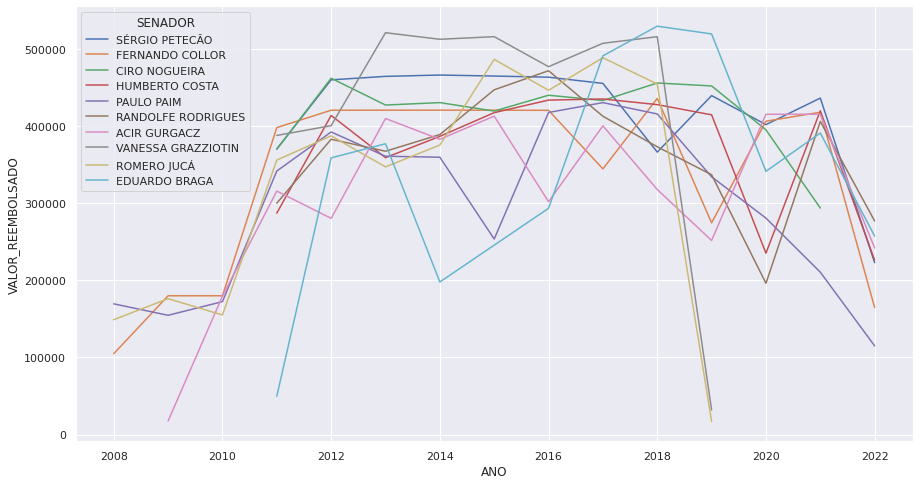

In [55]:
df_gb_sen_2 = df.groupby('SENADOR').agg({'VALOR_REEMBOLSADO':'sum'}).sort_values(by='VALOR_REEMBOLSADO', ascending = False)

df_gb_ano_sen3 = df_gb_ano_sen.loc[df_gb_sen_2.index[:10]]
df_gb_ano_sen3 = df_gb_ano_sen3.reset_index(drop=False)


# Pegando apenas os 10 que mais gastaram.

ax = sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='ANO', y = 'VALOR_REEMBOLSADO', hue='SENADOR', data=df_gb_ano_sen3);

# Qual fornecedor teve maior volume de recurso recebido?

In [56]:
df.groupby('FORNECEDOR').agg({'VALOR_REEMBOLSADO':'sum'}).sort_values(by='VALOR_REEMBOLSADO', ascending = False)

,VALOR_REEMBOLSADO
FORNECEDOR,
LATAM,4793627.86
TAM,4483589.08
GOL,4461458.32
ADRIA VIAGENS E TURISMO LTDA,2989161.96
Citel Service,1708782.14
...,...
Auto Posto Viracopos de Campinas Ltda,0.03
GM PETROLEO,0.03
Posto 1400,0.03


# Qual tipo de despesa teve maior volume de recurso demandado?

In [57]:
dfgb_vol = df.groupby('TIPO_DESPESA').agg({'VALOR_REEMBOLSADO':'sum'}).sort_values(by='VALOR_REEMBOLSADO', ascending = False)

display(dfgb_vol)

,VALOR_REEMBOLSADO
TIPO_DESPESA,
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",75229189.58
"Passagens aéreas, aquáticas e terrestres nacionais",68625685.07
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",58303401.60
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",52480129.67
Divulgação da atividade parlamentar,41093962.56
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",12327975.77
Serviços de Segurança Privada,3087309.08


# Evolução dos gastos pelo tipo de despesas, analisando apenas as que tiveram maior volume total.

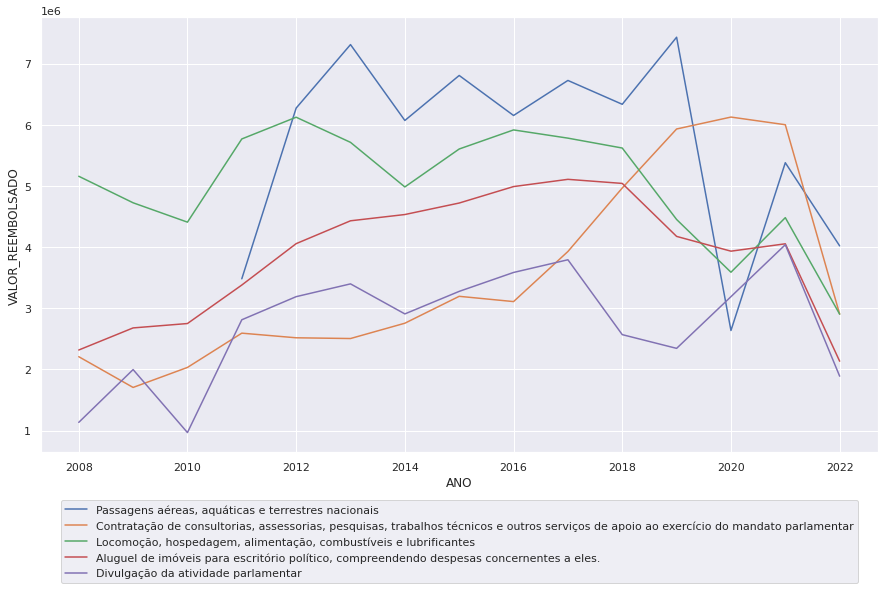

In [58]:
df2 = df[df.TIPO_DESPESA.apply(lambda x: True if x in dfgb_vol.index[:5] else False)]

dfgb_vol_ano = df2.groupby(['TIPO_DESPESA','ANO']).agg({'VALOR_REEMBOLSADO':'sum'}).sort_values(by='VALOR_REEMBOLSADO', ascending = False)
dfgb_vol_ano.reset_index(drop=False,inplace = True)

ax = sns.lineplot(x = 'ANO', y = 'VALOR_REEMBOLSADO', hue='TIPO_DESPESA', data = dfgb_vol_ano)
ax.legend(bbox_to_anchor=(0.5, -0.3), loc='lower center', borderaxespad=0);

# Qual ano teve maior gasto desde 2008?

,VALOR_REEMBOLSADO
ANO,
2017,26673327.06
2018,25604701.33
2016,25301959.82
2019,25248242.40
2021,25020323.84
2015,24863266.59
2013,24658952.86
2012,23354742.37
2014,22519394.12


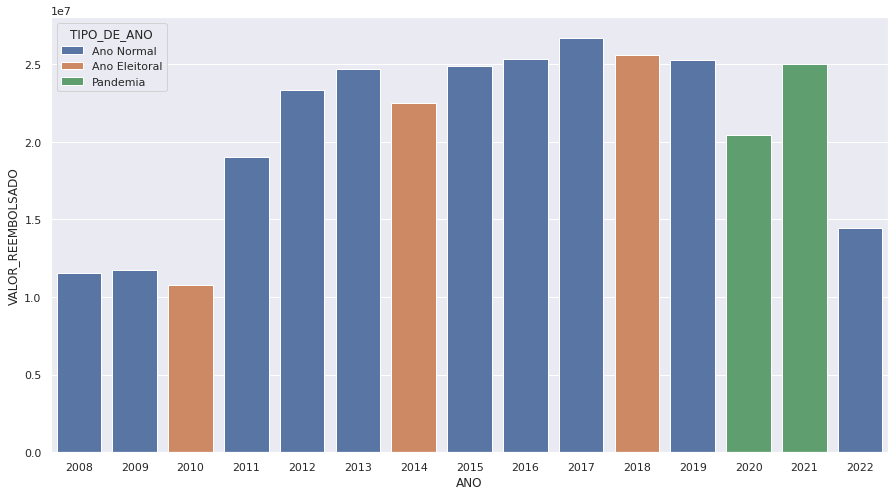

In [59]:
dfgb_ano = df.groupby('ANO').agg({'VALOR_REEMBOLSADO':'sum'}).sort_values(by='VALOR_REEMBOLSADO', ascending = False)

display(dfgb_ano)

dfgb_ano['TIPO_DE_ANO'] = ['Ano Eleitoral' if k in [2018,2014,2010] else 'Pandemia' if k in [2020,2021] else 'Ano Normal' for k in dfgb_ano.index ]

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = dfgb_ano.index, y = 'VALOR_REEMBOLSADO', hue='TIPO_DE_ANO',dodge=False, data=dfgb_ano);

# Qual mês teve maior gasto ?

In [60]:
df.groupby('MES').agg({'VALOR_REEMBOLSADO':'sum'}).sort_values(by='VALOR_REEMBOLSADO', ascending = False)

,VALOR_REEMBOLSADO
MES,
12,33459269.36
11,28417747.92
3,27718681.74
5,26708330.51
6,26430847.14
4,26233213.50
10,25550686.08
8,24777484.65
7,24635853.34


# Como é a evolução dos gastos mensais ?

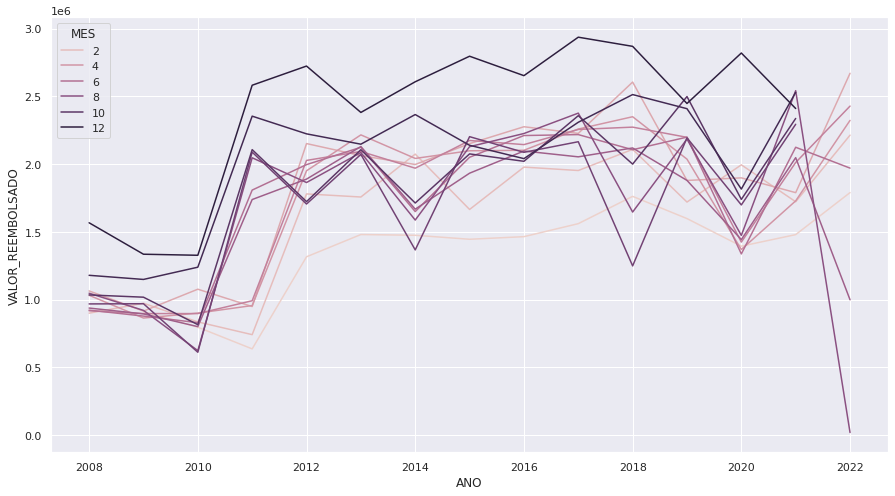

In [61]:
df_gb_ano_mes = df.groupby(['ANO','MES']).agg({'VALOR_REEMBOLSADO':'sum'}).sort_values(by='VALOR_REEMBOLSADO', ascending = False)

df_gb_ano_mes.reset_index(drop=False,inplace = True)

sns.lineplot(x = 'ANO', y = 'VALOR_REEMBOLSADO', hue='MES', data = df_gb_ano_mes);

# Day 3 : Forecasting

Para a previsão usarei os dados dos últimos 10 anos.

## Dataframe analisado

In [82]:
dff = df[df.ANO>2011]
dff.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
62738,2012,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001,12/01/2012,NaN,5000.0,491142.0
62739,2012,1,ACIR GURGACZ,Aquisição de material de consumo para uso no e...,07.170.542/0001-51,INK JET INFORMÁTICA & PAPELARIA LTDA - ME,16615,13/01/2012,NaN,40.0,511345.0
62740,2012,1,ACIR GURGACZ,Aquisição de material de consumo para uso no e...,07.170.542/0001-51,INK JET INFORMÁTICA E PAPELARIA LTDA EPP,4100,13/01/2012,NaN,87.3,511346.0
62741,2012,1,ACIR GURGACZ,Aquisição de material de consumo para uso no e...,07.170.542/0001-51,INK JET INFORMÁTICA E PAPELARIA LTDA EPP,4198,18/01/2012,NaN,172.3,511347.0
62742,2012,1,ACIR GURGACZ,Divulgação da atividade parlamentar,04.437.344/0001-13,RÁDIO JI-PARANÁ AM LTDA - ME,001064,02/01/2012,NaN,1500.0,511344.0


## Verificando dados faltantes

In [83]:
dff.isna().sum()

ANO                      0
MES                      0
SENADOR                  0
TIPO_DESPESA             0
CNPJ_CPF                 0
FORNECEDOR               0
DOCUMENTO            17182
DATA                     0
DETALHAMENTO         76376
VALOR_REEMBOLSADO        0
COD_DOCUMENTO            0
dtype: int64

## Varificando se as datas em conformidade e tranformando as data em formato Datetime

### Anos que incosistência

In [84]:
ano_inco = {k[-4:] for k in dff.DATA if k[-4:] not in [str(j) for j in range(2012,2023)]}

# Anos com dados bugados
ano_bug = dff[list(map(lambda k: True if k[-4:] in ano_inco else False, dff.DATA))]
ano_bug

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
63191,2012,12,AÉCIO NEVES,"Aluguel de imóveis para escritório político, c...",02.449.992/0454-27,Vivo S.A.,0150291500,22/12/2002,NaN,1624.72,684817.0
63820,2012,12,ALOYSIO NUNES FERREIRA,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,TAM LINHAS AÉREAS,957-2439874686,15/12/2011,VIAGEM REALIZADA EM 16/12/2011 PELO SENADOR AL...,1164.66,499196.0
63824,2012,1,ALVARO DIAS,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,Tam Linhas Aéreas,9572439448915,06/12/2011,Passageiro: Senador Alvaro Dias Trecho: São Pa...,251.56,494605.0
63974,2012,1,ANA AMÉLIA,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,TAM LINHAS AEREAS S/A,957 2439608877,08/12/2011,SEN ANA AMÉLIA PORTO ALEGRE / BRASÍLIA 08/01/2012,573.66,494463.0
63978,2012,1,ANA AMÉLIA,"Passagens aéreas, aquáticas e terrestres nacio...",05.730.375/0001-20,WEBJET LINHAS AÉREAS S/A,1018-185077 / 36GHBYIU,26/12/2011,MARCO AURÉLIO FERREIRA MAT. 234.245 PORTO ALEG...,460.53,494448.0
...,...,...,...,...,...,...,...,...,...,...,...
308232,2022,2,PAULO ROCHA,"Aluguel de imóveis para escritório político, c...",02.558.157/0001-62,Telefônica do Brasil S.A.,1129495338,11/02/2002,NaN,1106.13,2174871.0
308236,2022,2,PAULO ROCHA,"Contratação de consultorias, assessorias, pesq...",34.527.666/0001-14,Nailson Santos Guimarães 12404195204,17,22/03/2002,NaN,8000.00,2176739.0
308262,2022,3,PAULO ROCHA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens e Turismo Ltda,GENXJE,16/03/2002,"Companhia Aérea: LATAM, Localizador: GENXJE. P...",3553.23,2176808.0
308312,2022,7,PAULO ROCHA,"Aluguel de imóveis para escritório político, c...",04.895.728/0001-80,Equatorial Pará Distribuidora de Energia S.A.,0202206014025948,21/06/2002,NaN,1605.00,2183727.0


Para ajustar irei combinar a data como a composição do dia da coluna DATA, e a coluna MES e ANO.

In [85]:
for k in ano_bug.index:
    dtastr = dff.loc[k,'DATA'][:6]
    anostr = str(dff.loc[k,'ANO'])
    dff.loc[k,'DATA'] = dtastr + anostr

dff.loc[:,'DATA'] = pd.to_datetime(dff.DATA.values).copy()
dff

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [134]:
df_day = dff.groupby('DATA').agg({'VALOR_REEMBOLSADO':'sum'}).sort_index()
df_day.insert(0,'Media_movel',df_day.VALOR_REEMBOLSADO.rolling(30).mean())
df_day

,Media_movel,VALOR_REEMBOLSADO
DATA,,
2012-01-01,NaN,11144.59
2012-01-02,NaN,159979.03
2012-01-03,NaN,164028.96
2012-01-04,NaN,56871.83
2012-01-05,NaN,61795.31
...,...,...
2022-12-04,47292.342667,53257.14
2022-12-05,47245.810667,52149.81
2022-12-06,48202.448333,39016.59


In [150]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Scatter(x  = df_day.index, y=df_day.VALOR_REEMBOLSADO, name='VALOR_REEMBOLSADO',
                         line=dict(color='royalblue',width=2)))

fig.add_trace(go.Scatter(x  = df_day.index, y=df_day.Media_movel, name='Media_movel',
                         line=dict(color='firebrick', width=4)))

fig.show()

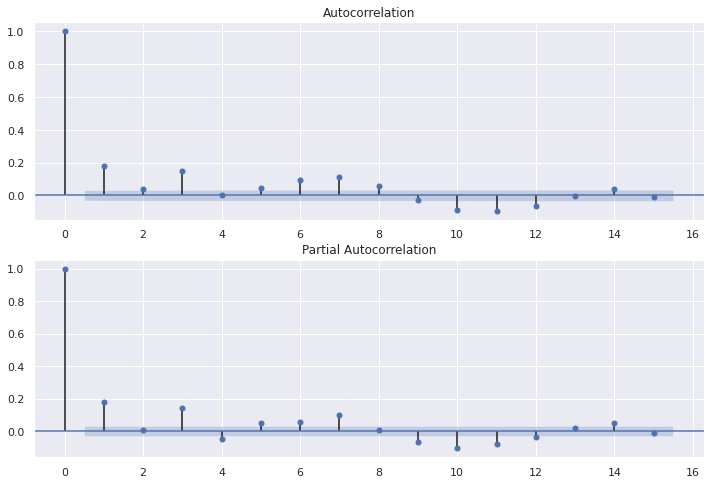

In [159]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)

fig = plot_acf(df_day.VALOR_REEMBOLSADO, lags=15, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df_day.VALOR_REEMBOLSADO, lags=15, ax=ax2)

In [120]:
df.to_csv("ceaps_2008_2022")